## Approximate Bayesian Computation

The simplest form of Simulation Based Inference is known as Approximate Bayesian Inference or ABC. ABC builds a posterior from a simulation

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [10]:

def simulation(parameters):
    return parameters[0]**(-1.5) + \
            np.random.normal(0, 5)

#def distance(parameters, data):
#    return np.sum(np.abs(data - gaussian(parameters)))

def prior(n):
    cube = np.zeros((n, 1))
    cube[:, 0] = np.random.uniform(0.03, 0.3, n)
    return cube

params = prior(1000)
data = [simulation(params[i]) for i in range(len(params))]

with plt.xkcd():
    plt.scatter(params, data)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('Parameter')
    plt.ylabel('Data')
    plt.savefig('joint-distribution.png', dpi=300, bbox_inches='tight')


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

In [13]:

def distance(sim_d, d):
    return np.abs(d - sim_d)

def sampling(samples, data, epsilon):

    posterior = []
    accepted_data = []
    for i in range(len(samples)):
        if distance(data[i], true_data) < epsilon:
            posterior.append(samples[i])
            accepted_data.append(data[i])
    posterior = np.array(posterior)
    accepted_data = np.array(accepted_data)
    return posterior, accepted_data

true_data = simulation([0.1]) + np.random.normal(0, 5)

with plt.xkcd():
    plt.scatter(params, data)
    plt.axhline(true_data, color='r', linestyle='--')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('Parameter')
    plt.ylabel('Data')
    plt.savefig('joint-distribution-with-data.png', dpi=300, bbox_inches='tight')

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

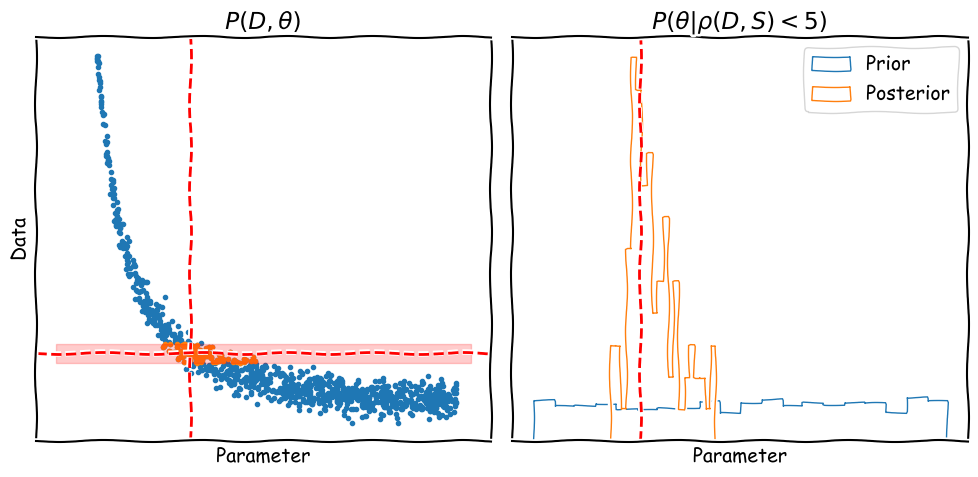

In [18]:
epsilon = 5
post, accs = sampling(params, data, epsilon)

with plt.xkcd():
    fig ,axes = plt.subplots(1, 2, figsize=(10, 5), sharex='col')
    axes[0].scatter(params, data, marker='.')
    axes[0].scatter(post, accs, marker='.')
    axes[0].axvline(0.1 , color='r', ls='--')
    axes[0].axhline(true_data, color='r', ls='--')
    axes[0].fill_between([0, 0.31], np.abs(true_data - epsilon), np.abs(true_data + epsilon),  color='r', alpha=0.2)
    axes[0].set_xlabel('Parameter')
    axes[0].set_ylabel('Data')

    axes[1].hist(params, bins=20, histtype='step', density=True)
    axes[1].hist(post, bins=20, histtype='step', density=True)
    axes[1].axvline(0.1 , color='r', ls='--')
    axes[1].set_xlabel('Parameter')
    axes[1].legend(['Prior', 'Posterior'])
    axes[0].set_title(r'$P(D, \theta)$')
    axes[1].set_title(r'$P(\theta|\rho(D, S) < 5)$')
    for i in range(2):
            axes[i].set_yticks([])
            axes[i].set_xticks([])
    plt.tight_layout()
    plt.savefig('posterior-sampling-samll-epsilon.png', dpi=300, bbox_inches='tight')
plt.show()
